# WAF Data Challenge Spring 2022 - Andrew Zhang
    Data Analysis of STEM Salaries using Levels.fyi Data
Hi, this notebook will aim to model data scientist salaries and evaluate the effectiveness of graduate degrees on wages.
This will include 3 key steps:
 > 1. Data preprocessing
 > 2. Model selection/training
 > 3. Evaluation of results

### Import Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns", None)
data = pd.read_csv('Levels_Fyi_Salary_Data.csv')
data.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,7392,807.0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7419,807.0,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,11527,819.0,3,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,7472,807.0,7,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7322,807.0,9,0,0,0,0,0,0,0,0,0,0,NaN,NaN


## Begin Data Pre-processing

Now that the dataset is imported, we see that this dataset contains multiple jobs. We just want to focus on Data Scientists. We also want to discover how these Data Scientists are distributed across companies.

In [3]:
ds_data = data[data['title'] == 'Data Scientist']
ds_data['company'].value_counts()

Amazon                  257
Microsoft               217
Facebook                184
Google                   89
Apple                    78
                       ... 
Applied Materials         1
Sandia National Labs      1
Oscar                     1
ZS Associates             1
BigCommerce               1
Name: company, Length: 467, dtype: int64

Now we will try to get a sense of the top earners

In [4]:
ds_data[ds_data['totalyearlycompensation'] > 550000].dropna()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
37470,12/16/2020 16:57:39,Airbnb,L5,Data Scientist,690000,"Seattle, WA",12.0,1.0,ML / AI,210000.0,438000.0,42000.0,Male,"Title: Senior Data Scientist, Race: Asian, Aca...",11527,819.0,51493,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree
41686,2/10/2021 14:14:45,Netflix,Only one level across Netflix,Data Scientist,600000,"Los Angeles, CA",10.0,5.0,Machine Learning,600000.0,0.0,0.0,Male,"Title: Senior Data Scientist, Race: White, Aca...",7275,803.0,57180,0,0,1,0,0,0,1,0,0,0,White,PhD
44183,3/7/2021 15:55:03,Stitch Fix,5,Data Scientist,577000,"San Francisco, CA",10.0,5.0,General,260000.0,317000.0,0.0,Male,"Title: Data Scientist, Race: White, Academic L...",7419,807.0,60454,0,1,0,0,0,0,1,0,0,0,White,Bachelor's Degree
45483,3/19/2021 11:26:47,Dropbox,M6,Data Scientist,650000,"San Francisco, CA",15.0,0.0,General,290000.0,260000.0,100000.0,Male,"Title: Director, Race: Asian, Academic Level: ...",7419,807.0,62125,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree
46211,3/26/2021 21:11:40,Facebook,IC7,Data Scientist,740000,"Menlo Park, CA",10.0,4.0,General,270000.0,400000.0,70000.0,Male,"Title: Research Data Science, Race: Asian, Aca...",7300,807.0,63056,0,0,1,0,0,1,0,0,0,0,Asian,PhD
48968,4/20/2021 15:37:06,Netflix,L6,Data Scientist,630000,"Los Angeles, CA",6.0,4.0,Content,630000.0,0.0,0.0,Male,"$10K relocation bonus, Title: Senior Data Scie...",7275,803.0,66583,0,0,1,0,0,0,1,0,0,0,White,PhD
50189,5/1/2021 19:58:28,Stitch Fix,L6,Data Scientist,580000,"San Francisco, CA",16.0,3.0,General,280000.0,300000.0,0.0,Male,"Title: Data Scientist, Race: White, Academic L...",7419,807.0,68141,0,0,1,0,0,0,1,0,0,0,White,PhD
56707,7/5/2021 18:21:22,Point72,Director,Data Scientist,650000,"New York, NY",8.0,0.0,finance,300000.0,0.0,350000.0,Male,"Title: Head Of Pricing Strategy, Race: White, ...",10182,501.0,76885,0,0,1,0,0,0,1,0,0,0,White,PhD
61437,8/13/2021 16:22:47,Facebook,M2,Data Scientist,700000,"Menlo Park, CA",16.0,2.0,Product Data Science,255000.0,375000.0,70000.0,Male,"Title: Data Science Manager, Race: White, Acad...",7300,807.0,83273,1,0,0,0,0,0,1,0,0,0,White,Master's Degree
61537,8/14/2021 8:07:55,Facebook,M2,Data Scientist,631000,"New York, NY",11.0,0.0,General,275000.0,287000.0,69000.0,Male,"Title: Data Science Manager, Race: White, Acad...",10182,501.0,83406,1,0,0,0,0,0,1,0,0,0,White,Master's Degree


In [5]:
ds_top_earners = ds_data.sort_values(by='totalyearlycompensation', ascending = False).head(50)
ds_top_earners

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
52222,5/23/2021 21:00:55,Instacart,L9,Data Scientist,1000000,"San Francisco, CA",16.0,1.0,Data,300000.0,700000.0,0.0,Other,Title: Sr Director,7419,807.0,70827,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4204,2/8/2019 10:53:44,eBay,Distinguished MTS,Data Scientist,900000,"San Jose, CA",12.0,2.0,ML / AI,300000.0,250000.0,350000.0,Male,NaN,7422,807.0,5737,0,0,0,0,0,0,0,0,0,0,NaN,NaN
34136,10/29/2020 14:34:13,Salesforce,Director,Data Scientist,800000,"San Francisco, CA",12.0,3.0,ML / AI,250000.0,500000.0,50000.0,NaN,NaN,7419,807.0,47019,0,0,0,0,0,0,0,0,0,0,NaN,NaN
60394,8/5/2021 15:05:29,Microsoft,66,Data Scientist,757000,"Mountain View, CA",5.0,0.0,"ML, AI",255000.0,420000.0,82000.0,NaN,Title: Principal Data Scientist,7322,807.0,81832,0,0,0,0,0,0,0,0,0,0,NaN,NaN
46211,3/26/2021 21:11:40,Facebook,IC7,Data Scientist,740000,"Menlo Park, CA",10.0,4.0,General,270000.0,400000.0,70000.0,Male,"Title: Research Data Science, Race: Asian, Aca...",7300,807.0,63056,0,0,1,0,0,1,0,0,0,0,Asian,PhD
62142,8/25/2019 15:17:01,Amazon,L7,Data Scientist,740000,"Seattle, WA",12.0,7.0,ML / AI,160000.0,430000.0,0.0,NaN,NaN,11527,819.0,13677,0,0,0,0,0,0,0,0,0,0,NaN,NaN
19876,4/21/2020 17:07:22,Lyft,7,Data Scientist,730000,"San Francisco, CA",12.0,2.0,ML / AI,260000.0,470000.0,0.0,Male,NaN,7419,807.0,27078,0,0,0,0,0,0,0,0,0,0,NaN,NaN
35673,11/20/2020 12:27:08,Snap,L5,Data Scientist,728000,"Santa Monica, CA",7.0,4.0,ML / AI,210000.0,500000.0,18000.0,NaN,Title: Research Scientist,7438,803.0,49103,0,0,0,0,0,0,0,0,0,0,NaN,NaN
30895,9/24/2020 17:35:58,Amazon,L7,Data Scientist,710000,"Seattle, WA",13.0,1.0,ML / AI,160000.0,375000.0,175000.0,NaN,NaN,11527,819.0,42602,0,0,0,0,0,0,0,0,0,0,NaN,NaN
35867,11/23/2020 13:44:15,Netflix,Only one level across Netflix,Data Scientist,700000,"Los Angeles, CA",8.0,4.0,ML / AI,700000.0,0.0,0.0,NaN,Academic Level: Doctorate (PhD),7275,803.0,49361,0,0,1,0,0,0,0,0,0,0,NaN,PhD


In [6]:
ds_top_earners[['City', 'State']] = ds_top_earners['location'].str.split(', ', 1, expand=True)

In [7]:
# ds_data[['City', 'State']] = ds_data['location'].str.split(', ', 1, expand=True)

In [8]:
# series = ds_data['State'].value_counts().plot(kind='pie')
# plt.show()

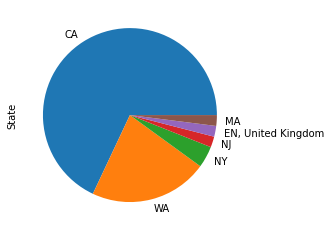

In [9]:
series = ds_top_earners['State'].value_counts().plot(kind='pie')
plt.show()

This is a pie chart for geographical distribution of top earners

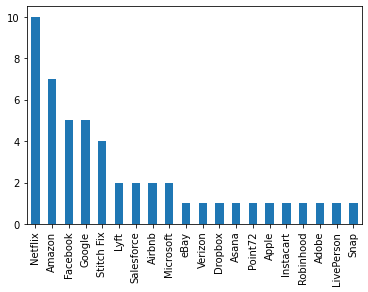

In [10]:
series = ds_top_earners['company'].value_counts().plot(kind='bar')
plt.show()

This represents the company distribution of top earners

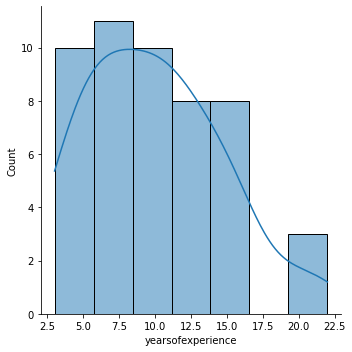

In [11]:
sns.displot(data = ds_top_earners, x = 'yearsofexperience', kde = True)
plt.show()

This represents the experience distribution among top earners

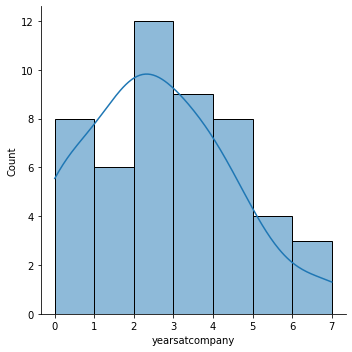

In [12]:
sns.displot(data = ds_top_earners, x = 'yearsatcompany', kde = True)
plt.show()

This shows the years the top earners have spent at their current company. Note that less than 20% have been at their current job for over 5 years.

To better get a sense of how all the features interact, we will create a heat map to determine correlations between features

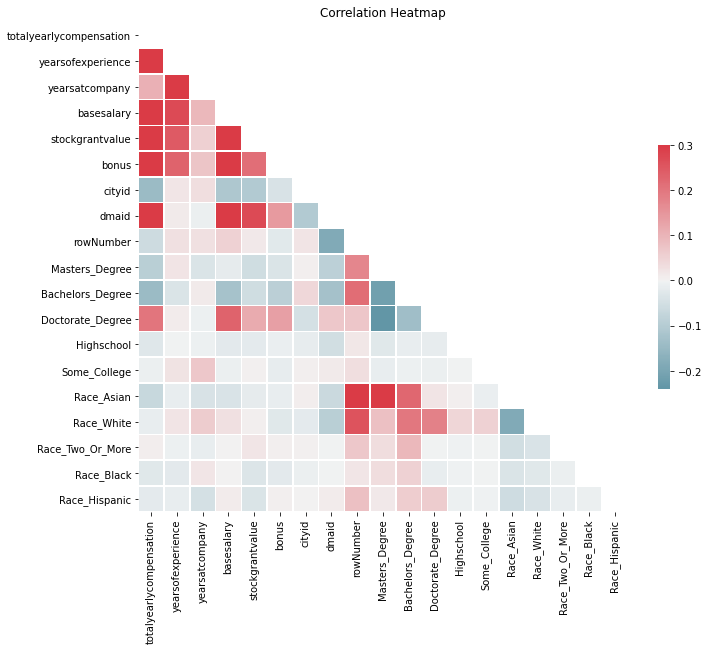

In [13]:
corr = ds_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap")
plt.show()

We see that there are features that correlate, however none of them are greater than 0.3, which shouldn't interfere too much with model training.

### Distribution of Data Scientists Across Companies
We see that the data scientists are distributed across many companies, with the largest big-tech firms like Amazon owning no more than 10% of the market. There is nothing that indicates the data would not be reflective of Data Scientists as a whole.

Now we want to determine the location of these data scientists. We will import a dictionary of states to help with the processing of location entries. The values are the cost of living index for each state.

In [14]:
states = {'AK': 127, 'AL': 88, 'AR': 91, 'AZ': 103, 'CA': 142, 'CO': 105, 'CT': 122, 'DC': 158, 'DE': 108, 'FL': 100, 'GA': 89,
           'HI': 193, 'IA': 90, 'ID': 102, 'IL': 94, 'IN': 90, 'KS': 87, 'KY': 93, 'LA': 93, 'MA': 135, 'MD': 124, 'ME': 115,
           'MI':91, 'MN': 100, 'MO': 89, 'MS': 83, 'MT': 101, 'NC': 96, 'ND': 98, 'NE': 94, 'NH': 110, 'NJ': 115, 'NM': 91,
           'NV': 106, 'NY': 148, 'OH': 91, 'OK': 88, 'OR': 130, 'PA': 103, 'RI': 117, 'SC': 94, 'SD': 101, 'TN': 89, 'TX': 92,
           'UT': 99, 'VA': 102, 'VT': 117, 'WA': 112, 'WI': 96, 'WV': 91, 'WY': 94}
ds_data['location'].value_counts()

San Francisco, CA    373
Seattle, WA          311
New York, NY         245
Redmond, WA          105
Menlo Park, CA        94
                    ... 
Dublin, NH             1
Longmont, CO           1
Alpharetta, GA         1
Shelton, CT            1
Birmingham, AL         1
Name: location, Length: 225, dtype: int64

### Locations as Indicator of Cost of Living
As expected, the data scientists are located in tech hubs such as San Francisco, Seattle, and New York. These areas are also known for higher costs of living, which could play a factor in total compensation. Thus, we want to hold onto this data.

Since we have determined that location data is an important feature, we want to make it more readable. We will split the location into two columns: City and State.

In [15]:
# Splits location column into City and State
ds_data[['City', 'State']] = ds_data['location'].str.split(', ', 1, expand=True)
ds_data.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,City,State
419,6/5/2018 14:06:30,LinkedIn,Senior,Data Scientist,233000,"San Francisco, CA",4.0,0.0,Data Analysis,162000.0,220000.0,10000.0,Male,NaN,7419,807.0,813,0,0,0,0,0,0,0,0,0,0,NaN,NaN,San Francisco,CA
440,6/8/2018 9:49:25,Microsoft,64,Data Scientist,218000,"Seattle, WA",11.0,11.0,ML / AI,165000.0,28000.0,23000.0,Male,NaN,11527,819.0,849,0,0,0,0,0,0,0,0,0,0,NaN,NaN,Seattle,WA
444,6/8/2018 17:55:09,ebay,26,Data Scientist,180000,"San Jose, CA",10.0,5.0,NaN,0.0,0.0,0.0,Female,NaN,7422,807.0,855,0,0,0,0,0,0,0,0,0,0,NaN,NaN,San Jose,CA
454,6/10/2018 19:39:35,Twitter,Staff,Data Scientist,500000,"San Francisco, CA",4.0,4.0,ML / AI,200000.0,280000.0,20000.0,Male,NaN,7419,807.0,870,0,0,0,0,0,0,0,0,0,0,NaN,NaN,San Francisco,CA
495,6/17/2018 11:39:38,Facebook,5,Data Scientist,370000,"Seattle, WA",8.0,3.0,NaN,190000.0,140000.0,40000.0,Male,NaN,11527,819.0,938,0,0,0,0,0,0,0,0,0,0,NaN,NaN,Seattle,WA


In [16]:
ds_data['State'].value_counts()

CA                 960
WA                 450
NY                 254
TX                  81
MA                  70
                  ... 
NH                   1
ZH, Netherlands      1
SP, Brazil           1
NW, Germany          1
CT, Australia        1
Name: State, Length: 86, dtype: int64

In [17]:
ds_data

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,City,State
419,6/5/2018 14:06:30,LinkedIn,Senior,Data Scientist,233000,"San Francisco, CA",4.0,0.0,Data Analysis,162000.0,220000.0,10000.0,Male,NaN,7419,807.0,813,0,0,0,0,0,0,0,0,0,0,NaN,NaN,San Francisco,CA
440,6/8/2018 9:49:25,Microsoft,64,Data Scientist,218000,"Seattle, WA",11.0,11.0,ML / AI,165000.0,28000.0,23000.0,Male,NaN,11527,819.0,849,0,0,0,0,0,0,0,0,0,0,NaN,NaN,Seattle,WA
444,6/8/2018 17:55:09,ebay,26,Data Scientist,180000,"San Jose, CA",10.0,5.0,NaN,0.0,0.0,0.0,Female,NaN,7422,807.0,855,0,0,0,0,0,0,0,0,0,0,NaN,NaN,San Jose,CA
454,6/10/2018 19:39:35,Twitter,Staff,Data Scientist,500000,"San Francisco, CA",4.0,4.0,ML / AI,200000.0,280000.0,20000.0,Male,NaN,7419,807.0,870,0,0,0,0,0,0,0,0,0,0,NaN,NaN,San Francisco,CA
495,6/17/2018 11:39:38,Facebook,5,Data Scientist,370000,"Seattle, WA",8.0,3.0,NaN,190000.0,140000.0,40000.0,Male,NaN,11527,819.0,938,0,0,0,0,0,0,0,0,0,0,NaN,NaN,Seattle,WA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62240,3/26/2019 17:25:02,IBM,8,Data Scientist,155000,"Washington, DC",5.0,2.0,ML / AI,141000.0,0.0,14000.0,Male,NaN,40303,511.0,7099,0,0,0,0,0,0,0,0,0,0,NaN,NaN,Washington,DC
62283,6/17/2018 21:07:18,Facebook,E3,Data Scientist,150000,"Singapore, SG, Singapore",0.0,0.0,ML / AI,150000.0,30000.0,30000.0,Female,NaN,17912,0.0,944,0,0,0,0,0,0,0,0,0,0,NaN,NaN,Singapore,"SG, Singapore"
62285,7/16/2018 20:11:40,ADP,Sr UX Researcher 4,Data Scientist,185000,"Roseland, NJ",8.0,2.0,UX Research,150000.0,20000.0,15000.0,Male,NaN,36504,501.0,1136,0,0,0,0,0,0,0,0,0,0,NaN,NaN,Roseland,NJ
62529,6/12/2018 20:54:06,Google,T6,Data Scientist,685000,"Kirkland, WA",22.0,2.0,ML / AI,221000.0,296000.0,55000.0,Male,NaN,11497,819.0,900,0,0,0,0,0,0,0,0,0,0,NaN,NaN,Kirkland,WA


### Remove Non-United States Entries
Note that there are locations that are not in the United States. For the purposes of modelling salary, we should constrain data to only the United States due to large disparities in the Cost of Living between varying counties. In the next step, we will filter out rows with invalid states.

In [18]:
# Only keep entries with location within the United States
ds_data_US = ds_data[ds_data['State'].isin(states)]
ds_data_US

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,City,State
419,6/5/2018 14:06:30,LinkedIn,Senior,Data Scientist,233000,"San Francisco, CA",4.0,0.0,Data Analysis,162000.0,220000.0,10000.0,Male,NaN,7419,807.0,813,0,0,0,0,0,0,0,0,0,0,NaN,NaN,San Francisco,CA
440,6/8/2018 9:49:25,Microsoft,64,Data Scientist,218000,"Seattle, WA",11.0,11.0,ML / AI,165000.0,28000.0,23000.0,Male,NaN,11527,819.0,849,0,0,0,0,0,0,0,0,0,0,NaN,NaN,Seattle,WA
444,6/8/2018 17:55:09,ebay,26,Data Scientist,180000,"San Jose, CA",10.0,5.0,NaN,0.0,0.0,0.0,Female,NaN,7422,807.0,855,0,0,0,0,0,0,0,0,0,0,NaN,NaN,San Jose,CA
454,6/10/2018 19:39:35,Twitter,Staff,Data Scientist,500000,"San Francisco, CA",4.0,4.0,ML / AI,200000.0,280000.0,20000.0,Male,NaN,7419,807.0,870,0,0,0,0,0,0,0,0,0,0,NaN,NaN,San Francisco,CA
495,6/17/2018 11:39:38,Facebook,5,Data Scientist,370000,"Seattle, WA",8.0,3.0,NaN,190000.0,140000.0,40000.0,Male,NaN,11527,819.0,938,0,0,0,0,0,0,0,0,0,0,NaN,NaN,Seattle,WA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62233,2/10/2019 22:46:28,Deloitte,Senior Consultant,Data Scientist,190000,"Chicago, IL",3.0,0.0,ML / AI,160000.0,0.0,30000.0,Male,NaN,8198,602.0,5796,0,0,0,0,0,0,0,0,0,0,NaN,NaN,Chicago,IL
62240,3/26/2019 17:25:02,IBM,8,Data Scientist,155000,"Washington, DC",5.0,2.0,ML / AI,141000.0,0.0,14000.0,Male,NaN,40303,511.0,7099,0,0,0,0,0,0,0,0,0,0,NaN,NaN,Washington,DC
62285,7/16/2018 20:11:40,ADP,Sr UX Researcher 4,Data Scientist,185000,"Roseland, NJ",8.0,2.0,UX Research,150000.0,20000.0,15000.0,Male,NaN,36504,501.0,1136,0,0,0,0,0,0,0,0,0,0,NaN,NaN,Roseland,NJ
62529,6/12/2018 20:54:06,Google,T6,Data Scientist,685000,"Kirkland, WA",22.0,2.0,ML / AI,221000.0,296000.0,55000.0,Male,NaN,11497,819.0,900,0,0,0,0,0,0,0,0,0,0,NaN,NaN,Kirkland,WA


We see that by only evaluating locations in the United States, we have deleted over 300 rows.

In [19]:
# Finds the number of null entries in each column
ds_data_US.isna().sum()

timestamp                     0
company                       0
level                         5
title                         0
totalyearlycompensation       0
location                      0
yearsofexperience             0
yearsatcompany                0
tag                           5
basesalary                    0
stockgrantvalue               0
bonus                         0
gender                      739
otherdetails                699
cityid                        0
dmaid                         0
rowNumber                     0
Masters_Degree                0
Bachelors_Degree              0
Doctorate_Degree              0
Highschool                    0
Some_College                  0
Race_Asian                    0
Race_White                    0
Race_Two_Or_More              0
Race_Black                    0
Race_Hispanic                 0
Race                       1494
Education                  1052
City                          0
State                         0
dtype: i

### Invalid Entries
The above method finds the number of Null entries for each column. We note that the Null values primarily lie in gender, otherdetails, Race, and Education columns. We also know that levels contains company specific terminology, indicating that it would not be of much use.

In [20]:
ds_data_US['Education'].value_counts()

Master's Degree      662
PhD                  331
Bachelor's Degree    178
Highschool             2
Some College           1
Name: Education, dtype: int64

However, the Education column, despite having many Null entries, is of great importance since it is known to be an indicator of ability.

In [21]:
# Drop irrelevant columns
# ds_data_US_dropped = ds_data_US.drop(columns=['gender', 'otherdetails', 'Race', 'level'])
ds_data_final = ds_data_US[['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany', 'Education', 'State', 'company']]
ds_data_final

,totalyearlycompensation,yearsofexperience,yearsatcompany,Education,State,company
419,233000,4.0,0.0,NaN,CA,LinkedIn
440,218000,11.0,11.0,NaN,WA,Microsoft
444,180000,10.0,5.0,NaN,CA,ebay
454,500000,4.0,4.0,NaN,CA,Twitter
495,370000,8.0,3.0,NaN,WA,Facebook
...,...,...,...,...,...,...
62233,190000,3.0,0.0,NaN,IL,Deloitte
62240,155000,5.0,2.0,NaN,DC,IBM
62285,185000,8.0,2.0,NaN,NJ,ADP
62529,685000,22.0,2.0,NaN,WA,Google


Now that we have removed the irrelevant columns, we can remove the rows with Null values

In [22]:
# drop the null values
ds_data_final = ds_data_final.dropna()


Now we will create a new column containing the cost of living index for each state


In [23]:
ds_data_final['COL_index'] = ds_data_final['State'].apply(lambda x: states.get(x))
ds_data_final

,totalyearlycompensation,yearsofexperience,yearsatcompany,Education,State,company,COL_index
3427,125000,1.0,0.0,PhD,DC,Capital One,158
5392,332000,1.0,0.0,PhD,CA,Amazon,142
9156,210000,1.0,1.0,PhD,CA,Cruise,142
12059,306000,5.0,4.0,PhD,CA,Apple,142
12584,300000,19.0,13.0,Master's Degree,NJ,Johnson and Johnson,115
...,...,...,...,...,...,...,...
61687,250000,5.0,4.0,Master's Degree,CA,Adobe,142
61762,145000,6.0,5.0,Bachelor's Degree,NY,IBM,148
61771,110000,0.0,0.0,Master's Degree,VA,Booz Allen Hamilton,102
61793,120000,1.0,0.0,Master's Degree,OR,Xandr,130


In [24]:
ds_data_final['Edu_idx'] = ds_data_final['Education']
ds_data_final['Edu_idx'] = ds_data_final['Edu_idx'].apply({"Some College": 0, "Highschool": 0, "Bachelor's Degree": 0, "PhD": 1, "Master's Degree": 1}.get)



We will now use Edu_idx to represent the binary classification of no graduate degree (0), or graduate degree (1).

In [25]:
ds_data_final['totalyearlycompensation'] = ds_data_final['totalyearlycompensation'] / ds_data_final['COL_index']

## Adjust Total Compensation for Cost of Living
We know the companies across the US adjust wages based on cost of living in the location. Thus we will standardize the totalyearlycompensation by dividing each raw compensation number by its location's respective index for cost of living. To convert the standardized compensation back into USD, simple multiply by the cost-of-living index of the respective state.

Note that we grouped both Master's and PhD into the same Edu_idx: 3. This is because the problem at hand is determining if a graduate degree is 'worth it'. So a graduate degree includes both Master's and PhD.

Now we will adjust the years of experience to accomodate Phd and Masters students. This is because PhD students of the same age as undergrad-only student will have approximately 4 years less of industry experience. In the case of Master's students, this would be a 2 year disparity. Thus we will add 4 years of experience to PhD, and add 2 years to Master's.

In [26]:
# ds_data_final['yearsofexperience'] = ds_data_final.apply(lambda x: (x['yearsofexperience'] + 4) 
#                                                          if (ds_data_final['Education'] == "PhD") 
#                                                          else x['yearsofexperience'])
mask = (ds_data_final['Education'] == 'PhD')
ds_data_final['yearsofexperience'][mask] = ds_data_final['yearsofexperience'] + 4
mask = (ds_data_final['Education'] == "Master's Degree")
ds_data_final['yearsofexperience'][mask] = ds_data_final['yearsofexperience'] + 2
ds_data_final


  

,totalyearlycompensation,yearsofexperience,yearsatcompany,Education,State,company,COL_index,Edu_idx
3427,791.139241,5.0,0.0,PhD,DC,Capital One,158,1
5392,2338.028169,5.0,0.0,PhD,CA,Amazon,142,1
9156,1478.873239,5.0,1.0,PhD,CA,Cruise,142,1
12059,2154.929577,9.0,4.0,PhD,CA,Apple,142,1
12584,2608.695652,21.0,13.0,Master's Degree,NJ,Johnson and Johnson,115,1
...,...,...,...,...,...,...,...,...
61687,1760.563380,7.0,4.0,Master's Degree,CA,Adobe,142,1
61762,979.729730,6.0,5.0,Bachelor's Degree,NY,IBM,148,0
61771,1078.431373,2.0,0.0,Master's Degree,VA,Booz Allen Hamilton,102,1
61793,923.076923,3.0,0.0,Master's Degree,OR,Xandr,130,1


In [27]:
ds_data_read = ds_data_final
ds_data_final = ds_data_final.drop(columns=['State', 'Education'])


In [28]:
ds_data_final

,totalyearlycompensation,yearsofexperience,yearsatcompany,company,COL_index,Edu_idx
3427,791.139241,5.0,0.0,Capital One,158,1
5392,2338.028169,5.0,0.0,Amazon,142,1
9156,1478.873239,5.0,1.0,Cruise,142,1
12059,2154.929577,9.0,4.0,Apple,142,1
12584,2608.695652,21.0,13.0,Johnson and Johnson,115,1
...,...,...,...,...,...,...
61687,1760.563380,7.0,4.0,Adobe,142,1
61762,979.729730,6.0,5.0,IBM,148,0
61771,1078.431373,2.0,0.0,Booz Allen Hamilton,102,1
61793,923.076923,3.0,0.0,Xandr,130,1


Edu_idx
0    1455.27305
1    1775.63670
Name: totalyearlycompensation, dtype: float64
Edu_idx
0    653.046978
1    783.862732
Name: totalyearlycompensation, dtype: float64


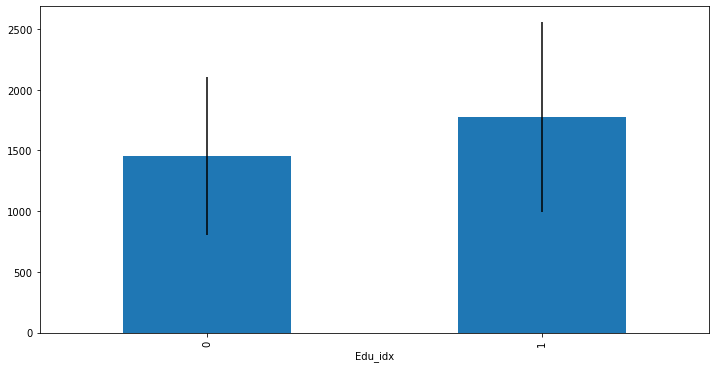

In [29]:
sal_mean_binary = ds_data_read['totalyearlycompensation'].groupby(ds_data_read['Edu_idx']).aggregate('mean')
sal_std_binary = ds_data_read['totalyearlycompensation'].groupby(ds_data_read['Edu_idx']).aggregate('std')
print(sal_mean_binary)
print(sal_std_binary)
sal_mean_binary.plot(kind='bar', figsize=(12, 6), yerr = sal_std_binary)
plt.show()

## Mean Compensation by Education
We see above the disparity of compensation between graduate degree and no graduate degree employees. The graduate degree mean is higher, with a larger standard deviation.

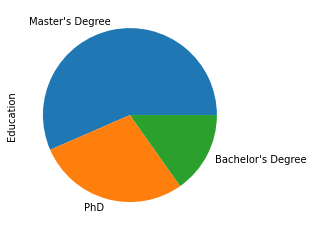

In [30]:
series = ds_data_read[~ds_data_read['Education'].isin(['Highschool', 'Some College'])]['Education'].value_counts().plot(kind='pie')
plt.show()

Education
Bachelor's Degree    1456.246719
Highschool           1368.574457
Master's Degree      1633.486905
PhD                  2059.936288
Some College         1455.357143
Name: totalyearlycompensation, dtype: float64
Education
Bachelor's Degree    657.198690
Highschool           548.972673
Master's Degree      711.369981
PhD                  843.689208
Some College                NaN
Name: totalyearlycompensation, dtype: float64


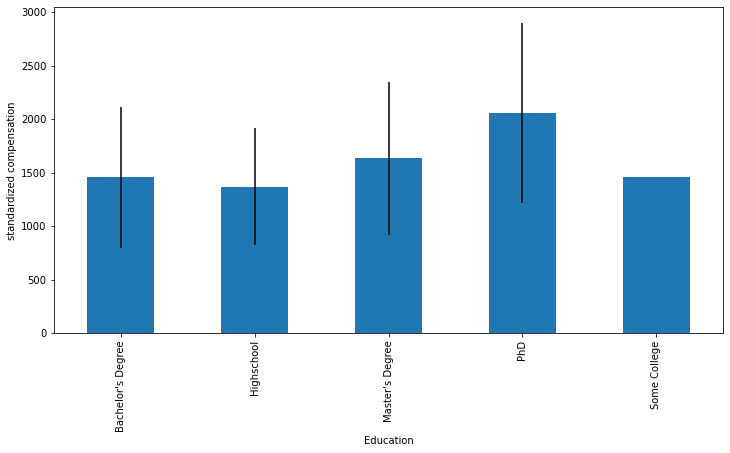

In [31]:
sal_mean = ds_data_read['totalyearlycompensation'].groupby(ds_data_read['Education']).aggregate('mean')
sal_std = ds_data_read['totalyearlycompensation'].groupby(ds_data_read['Education']).aggregate('std')
print(sal_mean)
print(sal_std)
sal_mean.plot(kind='bar', figsize=(12, 6), yerr = sal_std)
plt.ylabel('standardized compensation')
plt.show()

We see that PhD and Masters are distinctly higher than the others. Moreover, the high school is almost as high as the Bachelor's suggesting there may be self-selection going on here, where highly capable high school students choose to go straight into industry and skip college. However, it is important to note that the standard deviations of totalyearlycompensation is also relatively high.

Let us use a boxplot to visualize the data, we will get rid of the outliers as there are some datapoints in the millions which can skew results.

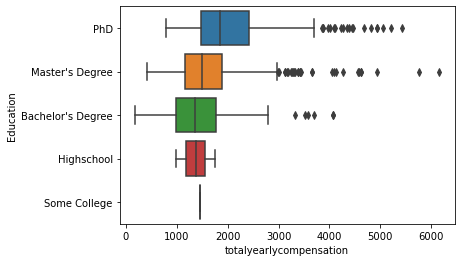

In [32]:
ax = sns.boxplot(x='totalyearlycompensation', y='Education', data=ds_data_read, showfliers=True)

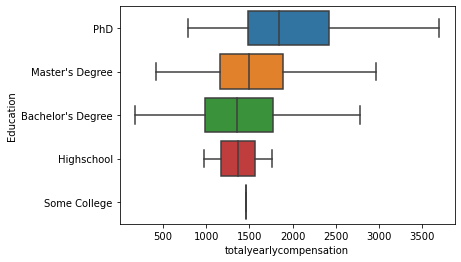

In [33]:
ax = sns.boxplot(x='totalyearlycompensation', y='Education', data=ds_data_read, showfliers=False)

## Removing Outliers
We will remove outliers which fall outside 1.5 times the IQR

In [34]:
Q1 = ds_data_read['totalyearlycompensation'].quantile(0.25)
Q3 = ds_data_read['totalyearlycompensation'].quantile(0.75)
IQR = Q3 - Q1



In [35]:

ds_data_read = ds_data_read[~((ds_data_read['totalyearlycompensation'] < (Q1 - 1.5 * IQR)) |(ds_data_read['totalyearlycompensation'] > (Q3 + 1.5 * IQR)))]



In [36]:
ds_data_read['yearsofexperience'] = ds_data_read['yearsofexperience'].round()
ds_data_read['yearsatcompany'] = ds_data_read['yearsatcompany'].round()
ds_data_read

,totalyearlycompensation,yearsofexperience,yearsatcompany,Education,State,company,COL_index,Edu_idx
3427,791.139241,5.0,0.0,PhD,DC,Capital One,158,1
5392,2338.028169,5.0,0.0,PhD,CA,Amazon,142,1
9156,1478.873239,5.0,1.0,PhD,CA,Cruise,142,1
12059,2154.929577,9.0,4.0,PhD,CA,Apple,142,1
12584,2608.695652,21.0,13.0,Master's Degree,NJ,Johnson and Johnson,115,1
...,...,...,...,...,...,...,...,...
61687,1760.563380,7.0,4.0,Master's Degree,CA,Adobe,142,1
61762,979.729730,6.0,5.0,Bachelor's Degree,NY,IBM,148,0
61771,1078.431373,2.0,0.0,Master's Degree,VA,Booz Allen Hamilton,102,1
61793,923.076923,3.0,0.0,Master's Degree,OR,Xandr,130,1


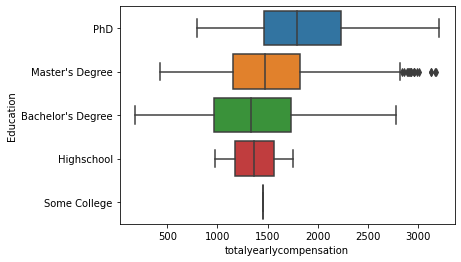

In [37]:
ax = sns.boxplot(x='totalyearlycompensation', y='Education', data=ds_data_read, showfliers=True)

Here we can confirm with the boxplot that the most extreme outliers have been removed.

In [38]:
ds_data_final = ds_data_read.drop(columns=['State', 'Education', 'COL_index'])

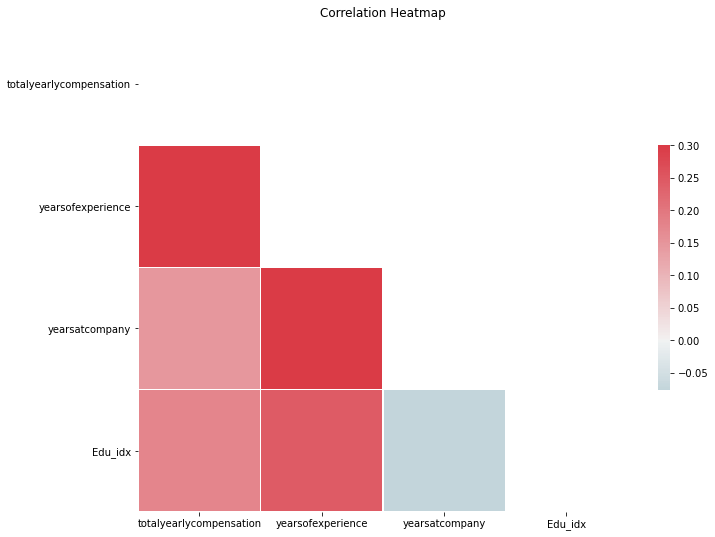

In [39]:
corr = ds_data_final.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap")
plt.show()

We see that yearsofexperience and totalyearlycompensation are positively correlated. On the same note, yearsatcompany is also correlated with totalyearly compensation. We also see that Edu_index is positively correlated with totalyearly compensation which is expected as grad-level students enter the workforce with higher wages than their undergrad counterparts. 

## Cleaned Data Distributions by Feature

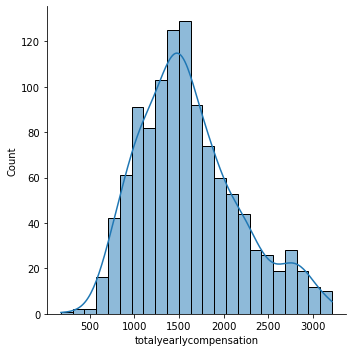

In [40]:
sns.displot(data = ds_data_final, x = 'totalyearlycompensation', kde = True)

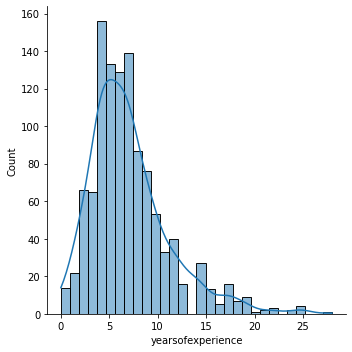

In [41]:
sns.displot(data = ds_data_final, x = 'yearsofexperience', kde = True)

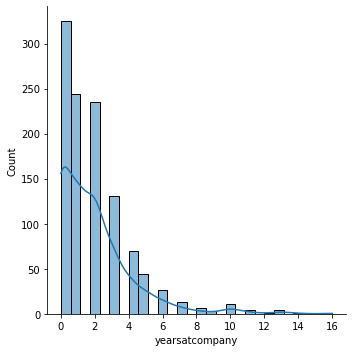

In [42]:
sns.displot(data = ds_data_final, x = 'yearsatcompany', kde = True)

Now we will visualize how yearsofexperience is distributed

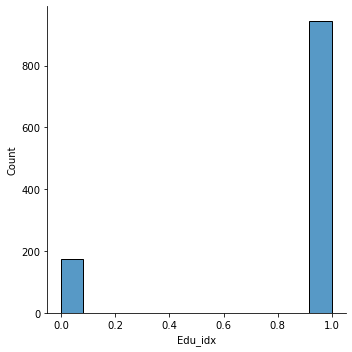

In [43]:
sns.displot(data = ds_data_final, x = 'Edu_idx')

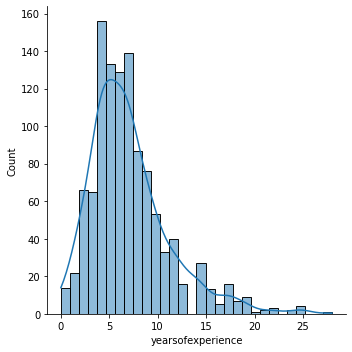

In [44]:
sns.displot(data = ds_data_final, x = 'yearsofexperience', kde = True)

It is important to note that PhDs have a large effect on younger workers, as having a PhD is often the largest differentiating factor between two employees. However, for seasoned professionals, they have already established themselves in the field, and their PhDs are less reflective of their actual ability.

We will split the yearsofexperience into two groups, under 6 years and over 6 years to determine if totalyearlycompensation is greater for PhDs in both.

In [45]:
exp_groups = [(ds_data_final['yearsofexperience'] <= 6), ds_data_final['yearsofexperience'] > 6]
ds_data_read['exp_group'] = np.select(exp_groups, [0, 1])


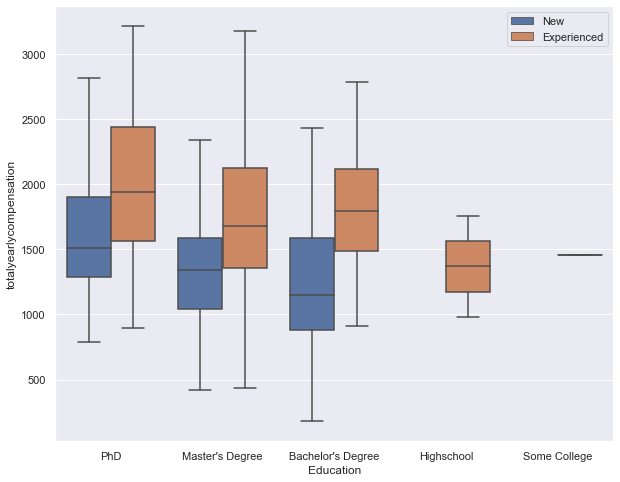

In [46]:
sns.set(rc={'figure.figsize':(10,8)})
key = ['New', 'Experienced']
exp_plot = sns.boxplot(y='totalyearlycompensation', x='Education', hue = 'exp_group', data=ds_data_read, showfliers=False)
h, l = exp_plot.get_legend_handles_labels()
exp_plot.legend(h, key)
plt.show()

While we see that experience does affect compensation greatly, the Graduate degrees still have noticable advantages in terms of compensation for both experience groups. However, the gap between these groups seems to diminish as experience increases. This implies that the median worker after gaining experience, will not benefit as greatly from the graduate degree as before. However, as shown by the whiskers, those with graduate degrees have higher peaks, or the potential to earn more.

## Hypothesis Testing
Now we will use hypothesis testing to establish if the difference in compensation is significant, or just due to chance. 

>H_0: mean graduate compensation = mean bachelor's and lower compensation

>H_1: mean graduate compensation > mean bachelor's and lower compensation

>These are all in terms of average USD. 

In [47]:
grad_comp = ds_data_final.loc[ds_data_final['Edu_idx']==1, 'totalyearlycompensation']
under_comp = ds_data_final.loc[ds_data_final['Edu_idx']==0, 'totalyearlycompensation']

First we want to check that the total compensation follows a gaussian distribution. If not, we will apply a log transform.

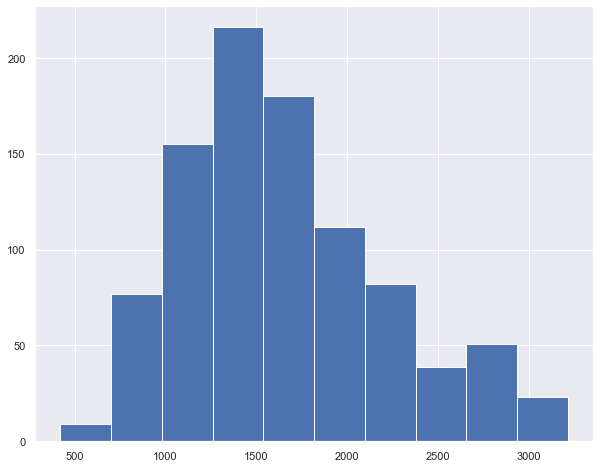

In [48]:
grad_comp.hist()
plt.show()

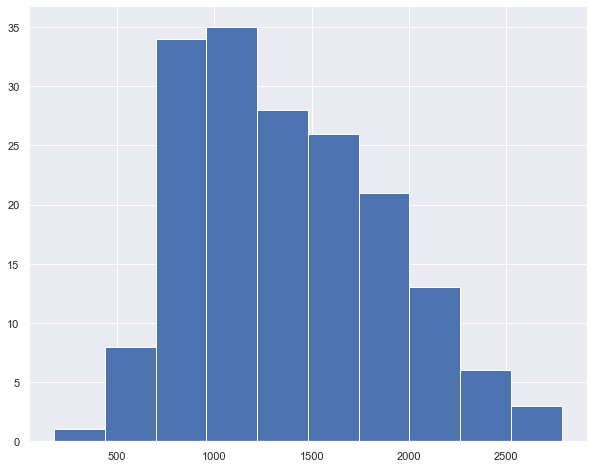

In [49]:
under_comp.hist()
plt.show()

Because the graphs are not normal, we will apply the log transform

In [50]:
grad_comp_lg = np.log(grad_comp)
under_comp_lg = np.log(under_comp)

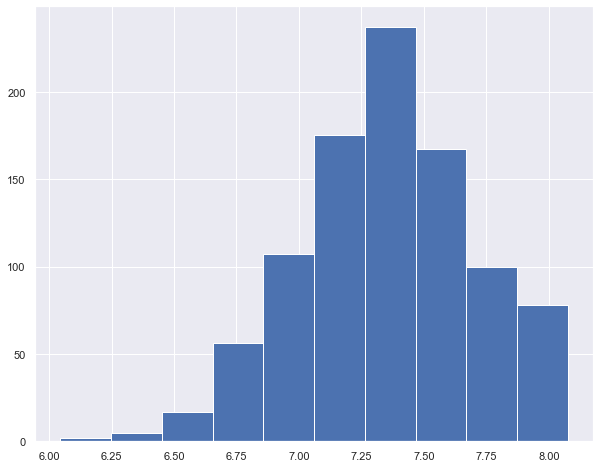

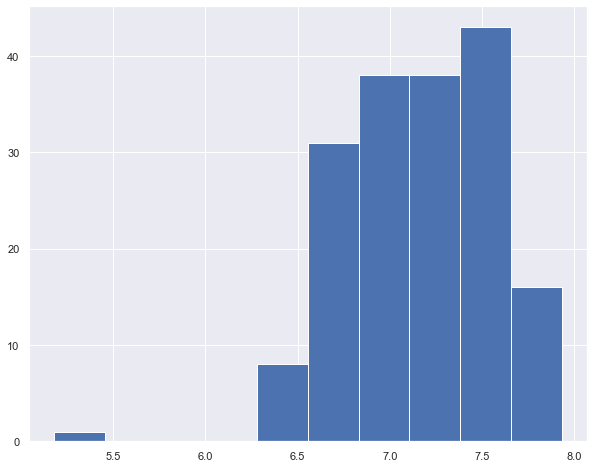

In [51]:
grad_comp_lg.hist()
plt.show()
under_comp_lg.hist()
plt.show()

Now the distributions are approximately normal so the t-test can proceed

In [52]:
import scipy.stats as st
arr1 = grad_comp_lg.to_numpy()
arr2 = under_comp_lg.to_numpy()
st.ttest_ind(a = arr1, b = arr2, equal_var = False)


Ttest_indResult(statistic=6.100814656273619, pvalue=4.574055685018125e-09)

In [53]:
# Calculate confidence interval for difference in means
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(arr1), sms.DescrStatsW(arr2))
print(cm.tconfint_diff(usevar='unequal'))

(0.13349394921415064, 0.2608773907682023)


Since the confidence interval for the difference of means is strictly positive, we reject the null hypothesis and conclude that graduate degrees do positively affect total compensation.

We see that the p-value is much smaller than the traditional alpha value of 0.05. Although this library can only perform 2-sided tests, it is abundantly clear from the incredibly low p-value that a graduate degree significatly affects total compensation positively.

In [54]:
ds_data_final

,totalyearlycompensation,yearsofexperience,yearsatcompany,company,Edu_idx
3427,791.139241,5.0,0.0,Capital One,1
5392,2338.028169,5.0,0.0,Amazon,1
9156,1478.873239,5.0,1.0,Cruise,1
12059,2154.929577,9.0,4.0,Apple,1
12584,2608.695652,21.0,13.0,Johnson and Johnson,1
...,...,...,...,...,...
61687,1760.563380,7.0,4.0,Adobe,1
61762,979.729730,6.0,5.0,IBM,0
61771,1078.431373,2.0,0.0,Booz Allen Hamilton,1
61793,923.076923,3.0,0.0,Xandr,1


## Multiple Linear Regression
To futher reinforce and quantify how significant a graduate degree is to total compensation. We will train a multiple linear regression model and then interpret the coefficients.

In [55]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
train, test = train_test_split(ds_data_final, test_size=0.2)

In [56]:
train_x = train[['yearsofexperience', 'yearsatcompany', 'Edu_idx']]
test_x = test[['yearsofexperience', 'yearsatcompany', 'Edu_idx']]
train_y = train[['totalyearlycompensation']]
test_y = test[['totalyearlycompensation']]

In [57]:
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

LinearRegression()

In [58]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 [1128.24507517]
Coefficients: 
 [[ 64.29672651 -16.36817467  78.77237257]]


In [59]:
lr_pred = regr.predict(test_x)
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test_y, lr_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_y, lr_pred))

# # Plot outputs
# plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
# plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()

Coefficients: 
 [[ 64.29672651 -16.36817467  78.77237257]]
Mean squared error: 243466.03
Coefficient of determination: 0.17


In [60]:
import statsmodels.api as sm
model = sm.OLS(train_y, train_x).fit()
predictions = model.predict(test_x)
print(model.summary())

                                   OLS Regression Results                                   
Dep. Variable:     totalyearlycompensation   R-squared (uncentered):                   0.859
Model:                                 OLS   Adj. R-squared (uncentered):              0.859
Method:                      Least Squares   F-statistic:                              1816.
Date:                     Fri, 11 Feb 2022   Prob (F-statistic):                        0.00
Time:                             22:36:28   Log-Likelihood:                         -7055.5
No. Observations:                      895   AIC:                                  1.412e+04
Df Residuals:                          892   BIC:                                  1.413e+04
Df Model:                                3                                                  
Covariance Type:                 nonrobust                                                  
                        coef    std err          t      P>|t|      [0.

We see that yearsofexperience is positively correlated with total compensation. Moreover, we see that yearsatcompany do not matter as much as yearsofexperience. Moreover, the coefficient for Edu_idx * state's index would equal the 'premium' that people can earn from getting a graduate degree.

<AxesSubplot:xlabel='yearsatcompany'>

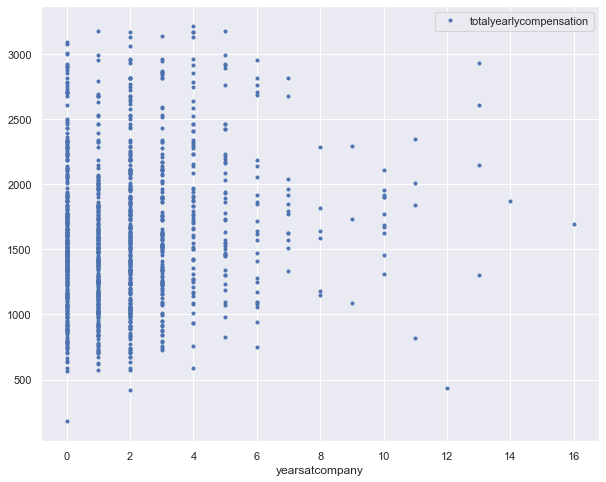

In [61]:
ds_data_final.plot(x='yearsatcompany', y='totalyearlycompensation', style=['.'])

<AxesSubplot:xlabel='yearsatcompany', ylabel='totalyearlycompensation'>

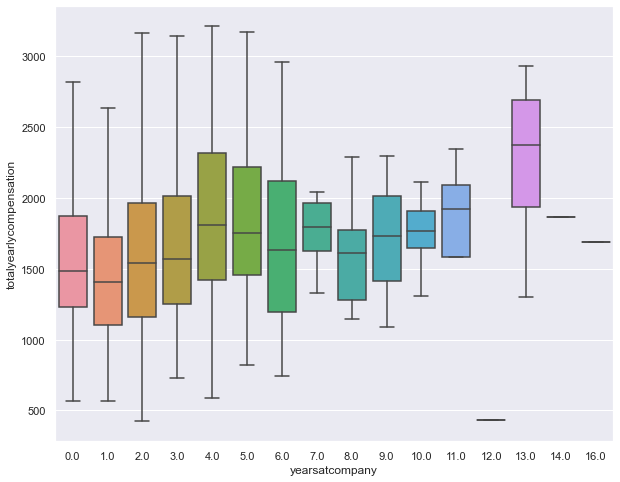

In [62]:
sns.boxplot(y='totalyearlycompensation', x='yearsatcompany', data=ds_data_read, showfliers=False)

It seems as if yearsatcompany does not greatly correlate with income relative to yearsofexperience, suggesting that people who stay at one company for a long time may be complacent and less motivated to work hard. Moreover, if a person stays at one company for a long time, they may be getting under their market wage, because the company may not increase wages at the market rate.

<AxesSubplot:xlabel='yearsofexperience'>

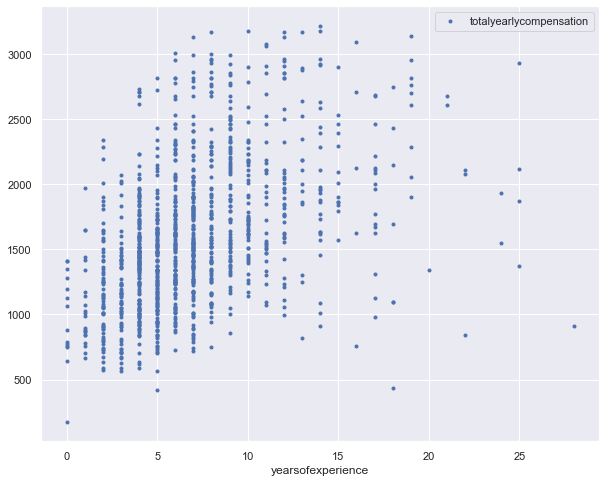

In [63]:
ds_data_final.plot(x='yearsofexperience', y='totalyearlycompensation', style='.')

<AxesSubplot:xlabel='yearsofexperience', ylabel='totalyearlycompensation'>

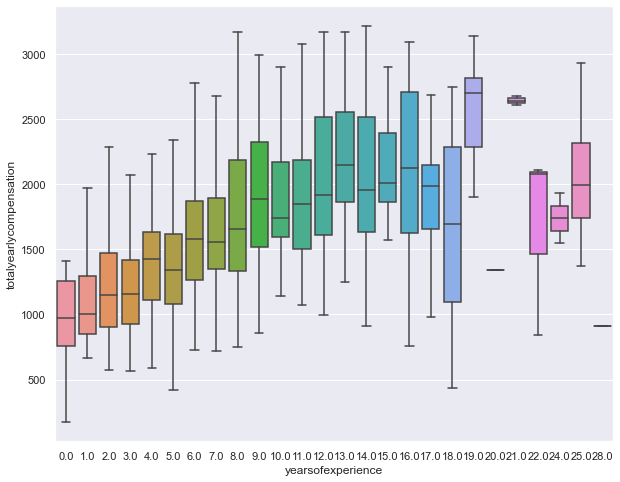

In [64]:
sns.boxplot(y='totalyearlycompensation', x='yearsofexperience', data=ds_data_read, showfliers=False)

This graph shows that there is a strong positive relationship between years of experience and total compensation

<AxesSubplot:xlabel='Edu_idx', ylabel='totalyearlycompensation'>

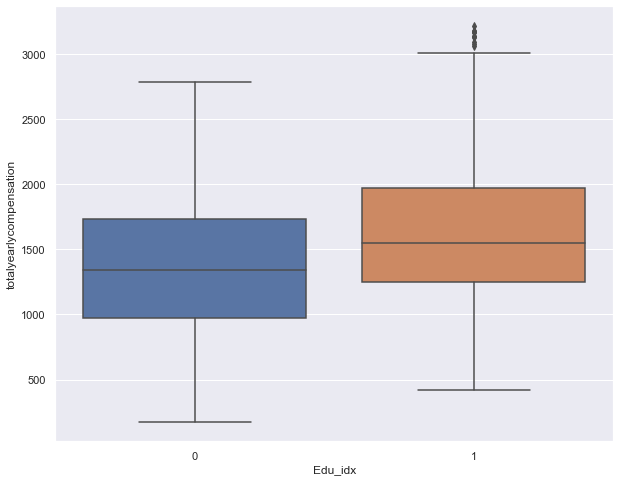

In [65]:
sns.boxplot(y='totalyearlycompensation', x='Edu_idx', data=ds_data_read, showfliers=True)

This is just another visualization for the income gap between those with and without graduate degrees.

## XGBoost Training and Feature Importance
XGBoost is a gradient boosted decision tree model which is able to capture relationships that linear models cannot. However, a limitation occurs when there is not enough quality data to properly train the model.

In [66]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as MSE
xgb_model = XGBRegressor()
bst = xgb_model.fit(train_x, train_y)

In [67]:
xgb_pred = xgb_model.predict(test_x)
# RMSE Computation
rmse_xgb = np.sqrt(MSE(test_y, xgb_pred))

rmse_lr = np.sqrt(MSE(test_y, lr_pred))


Linear regression vs XGBoost for predicting total compensation

In [68]:
print("RMSE Linear Reg : % f" %(rmse_lr))
print("RMSE XGBoost : % f" %(rmse_xgb))


RMSE Linear Reg :  493.422771
RMSE XGBoost :  571.355094


We see that despite XGBoost's industry success, the lack of enough quality data allowed Linear Regression to outperform XGBoost.

In [69]:
xgb_model.get_booster().get_score(importance_type="gain")

{'yearsofexperience': 109057.77676288913,
 'Edu_idx': 23730.450139223212,
 'yearsatcompany': 24315.741312570455}

This feature by XGBoost quantifies the influence that each feature has on determining total compensation.

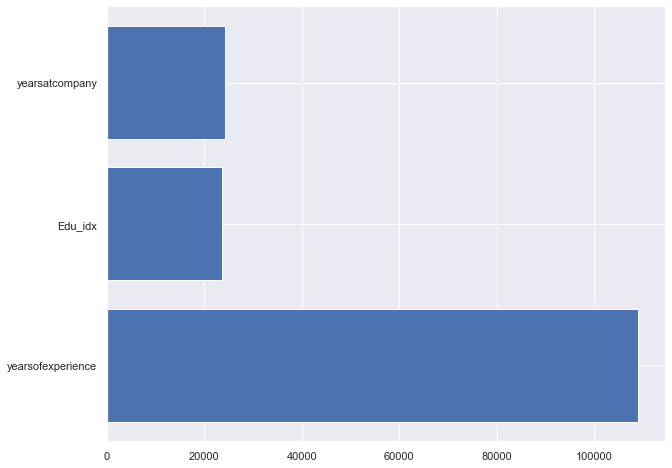

<Figure size 51840x20736 with 0 Axes>

In [70]:
feature_importance = xgb_model.get_booster().get_score(importance_type="gain")
plt.barh(list(feature_importance.keys()), list(feature_importance.values()), align='center')
plt.figure(figsize=(720, 288))
plt.show()

This chart shows the importance of each feature in determining a total compensation for data scientists. We see that education is actually the least influential feature in comparison with years of experience, and years at company. 

In [71]:
ds_data_final

,totalyearlycompensation,yearsofexperience,yearsatcompany,company,Edu_idx
3427,791.139241,5.0,0.0,Capital One,1
5392,2338.028169,5.0,0.0,Amazon,1
9156,1478.873239,5.0,1.0,Cruise,1
12059,2154.929577,9.0,4.0,Apple,1
12584,2608.695652,21.0,13.0,Johnson and Johnson,1
...,...,...,...,...,...
61687,1760.563380,7.0,4.0,Adobe,1
61762,979.729730,6.0,5.0,IBM,0
61771,1078.431373,2.0,0.0,Booz Allen Hamilton,1
61793,923.076923,3.0,0.0,Xandr,1


In [90]:
ds_data_final = pd.get_dummies(ds_data_final, columns=['company'])

In [91]:
train, test = train_test_split(ds_data_final, test_size=0.2)

In [92]:
train_x = train.drop(columns=['totalyearlycompensation'])

test_x = test.drop(columns=['totalyearlycompensation'])

In [93]:
train_y = train[['totalyearlycompensation']]
test_y = test[['totalyearlycompensation']]

In [94]:
xgb_model = XGBRegressor()
bst = xgb_model.fit(train_x, train_y)
xgb_pred = xgb_model.predict(test_x)
# RMSE Computation
rmse_xgb = np.sqrt(MSE(test_y, xgb_pred))

rmse_lr = np.sqrt(MSE(test_y, lr_pred))


In [95]:
print("RMSE XGBoost : % f" %(rmse_xgb))

RMSE XGBoost :  445.024336


In [96]:
xgb_model.get_booster().get_score(importance_type="gain")

{'yearsofexperience': 502392.11083241063,
 'company_Accenture': 326525.3019,
 'company_Microsoft': 488286.38213333336,
 'company_HCL Technologies': 117280.0,
 'company_GEICO': 79017.75779999999,
 'company_PwC': 609847.83118,
 'company_Fractal Analytics': 233457.55664999998,
 'company_JPMorgan Chase': 178299.54231666666,
 'company_Swiss Re': 189312.0,
 'company_Deloitte': 761419.9681,
 'company_Booz Allen Hamilton': 528506.51895,
 'company_Goldman sachs': 189880.01267500003,
 'company_Deloitte Advisory': 196932.477525,
 'company_Boeing': 355379.40234999993,
 'company_McKesson': 215117.73891666668,
 'company_Humana': 179355.48399999997,
 'company_Amazon': 710361.6172222222,
 'company_Snap': 712393.7732076924,
 'company_Facebook': 784895.8812368423,
 'company_IBM': 685503.9672000001,
 'company_Capital One': 462884.3098666666,
 'company_Nielsen': 378384.975575,
 'company_Poshmark': 254362.58723333335,
 'yearsatcompany': 177604.9986514667,
 'company_Charter Communications': 271387.339833333

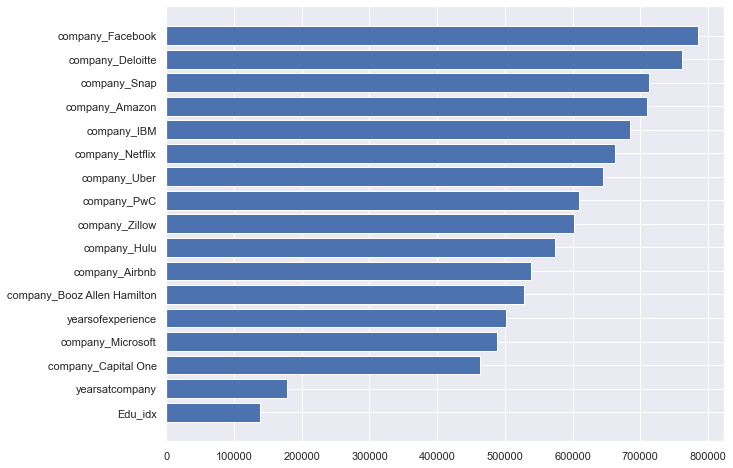

<Figure size 51840x20736 with 0 Axes>

In [116]:
feature_importance = xgb_model.get_booster().get_score(importance_type="gain")
feature_importance2 = {}
for key in feature_importance:
    if 'company_' in key and feature_importance[key] > 400000 or 'company_' not in key:
        feature_importance2[key] = feature_importance[key]
feature_importance2 = dict(sorted(feature_importance2.items(), key=lambda item: item[1]))
plt.barh(list(feature_importance2.keys()), list(feature_importance2.values()), align='center')
plt.figure(figsize=(720, 288))
plt.show()